# Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data Import and first Inspection

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

housing = pd.read_csv('housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [2]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
housing.isnull().describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640,20640,20640,20640,20640,20640,20640,20640,20640,20640
unique,1,1,1,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


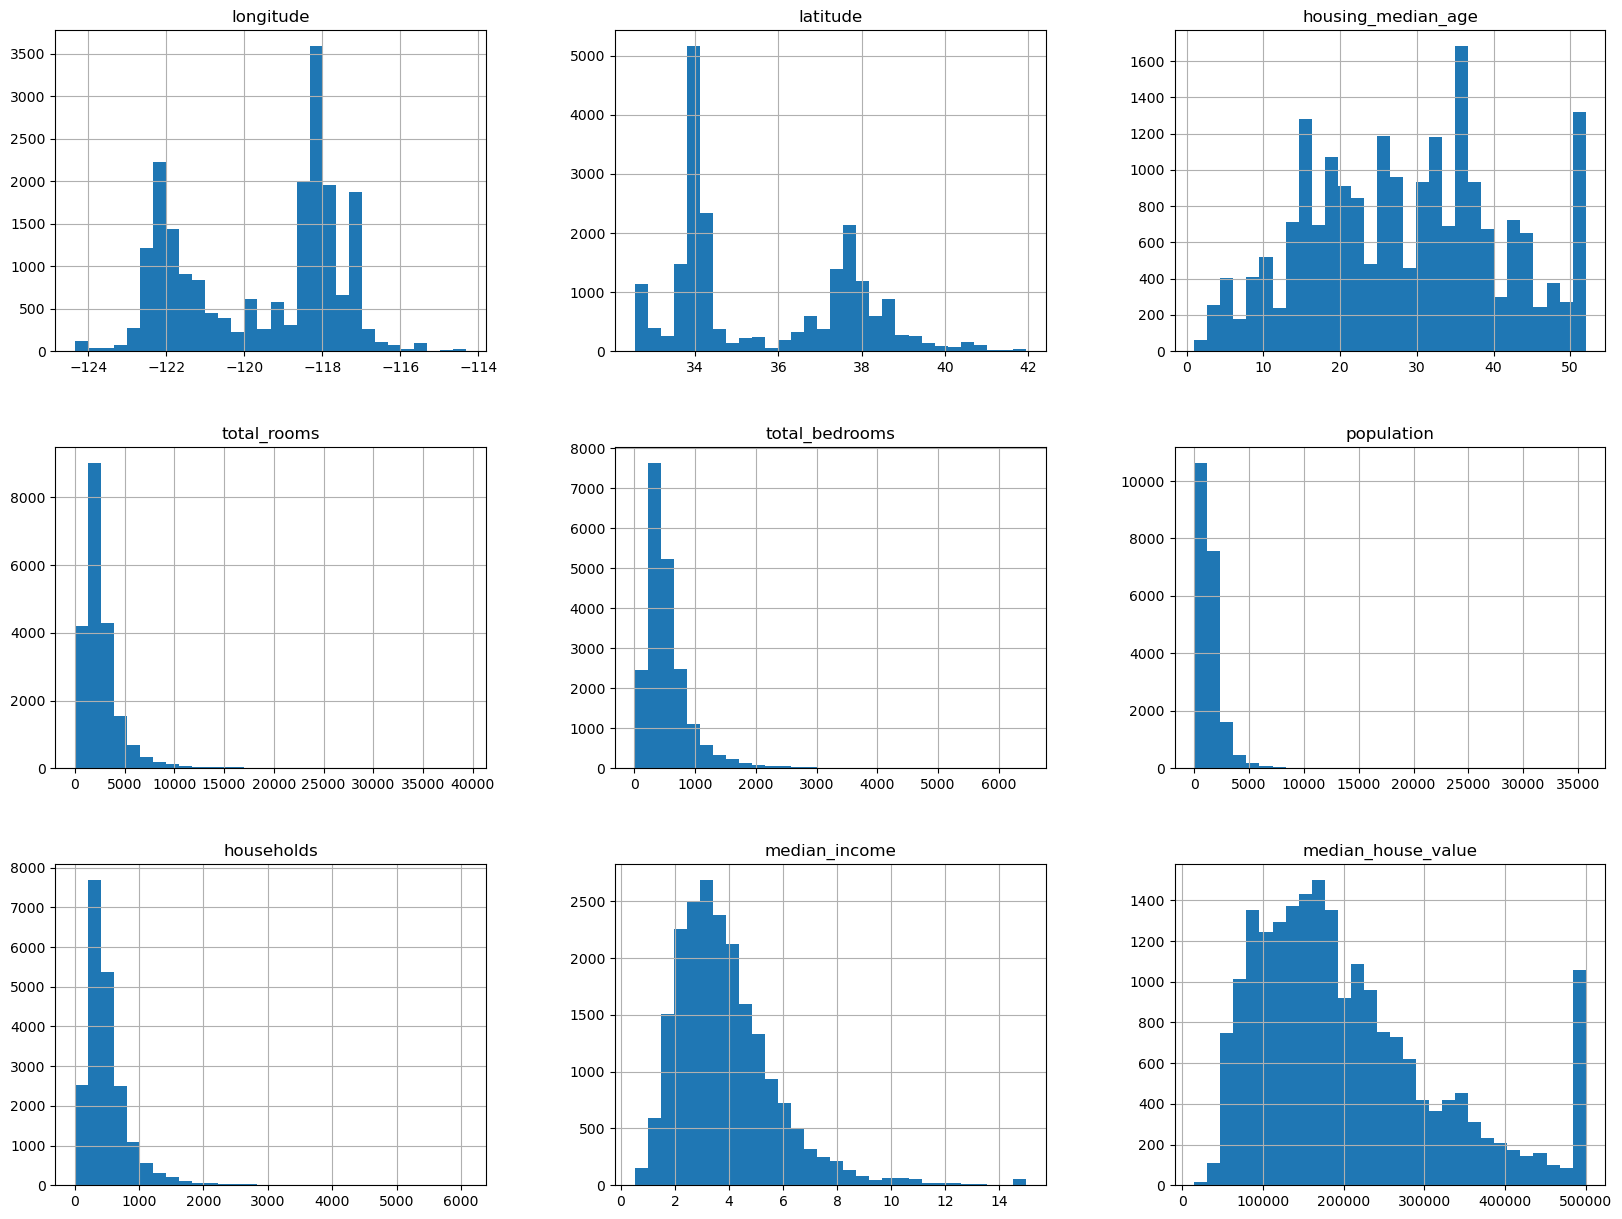

In [5]:
import matplotlib.pyplot as plt
housing.hist(figsize=[20, 15],bins=30)
plt.show()

## Data Cleaning and Creating additional Features

__Dropped all rows with at least one missing value(s).__

In [6]:
housing.iloc[:,4].value_counts(dropna=False).to_frame()

,count
total_bedrooms,
NaN,207
280.0,55
331.0,51
345.0,50
343.0,49
...,...
2961.0,1
1915.0,1
1215.0,1


In [7]:
housing.dropna(how='any', inplace=True)
housing.reset_index(inplace=True, drop=True)

In [8]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


 __Added the additional Feature ``rooms_per_household``.__

In [9]:
housing['rooms_per_household'] = housing.total_rooms.div(housing.households)
housing.rooms_per_household

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20428    5.045455
20429    6.114035
20430    5.205543
20431    5.329513
20432    5.254717
Name: rooms_per_household, Length: 20433, dtype: float64

__Added the additional Feature ``population_per_household``.__ 

In [10]:
housing['population_per_household'] = housing.population.div(housing.households)
housing.population_per_household

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20428    2.560606
20429    3.122807
20430    2.325635
20431    2.123209
20432    2.616981
Name: population_per_household, Length: 20433, dtype: float64

__Added the additional Feature ``bedrooms_per_household``.__

In [11]:
housing['bedrooms_per_household'] = housing.total_bedrooms.div(housing.households)
housing.bedrooms_per_household

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20428    1.133333
20429    1.315789
20430    1.120092
20431    1.171920
20432    1.162264
Name: bedrooms_per_household, Length: 20433, dtype: float64

## Factors influencing House Prices ¿wich ones?

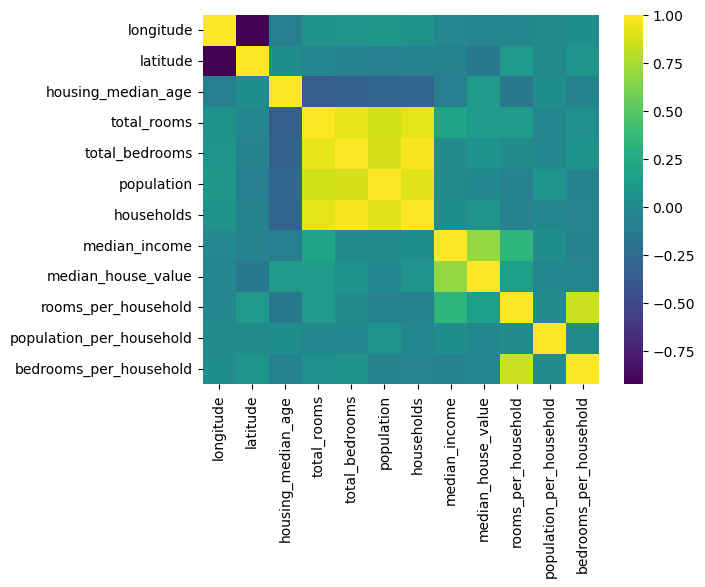

In [12]:
import seaborn as sns

sns.heatmap(housing.drop(columns='ocean_proximity').corr(), cmap='viridis')
plt.show()

__There is a strong positive correlation between median_income and median_house_value, indicating that income is a key determinant of home value. However, in coastal areas, this relationship may be less linear due to high real estate demand.__

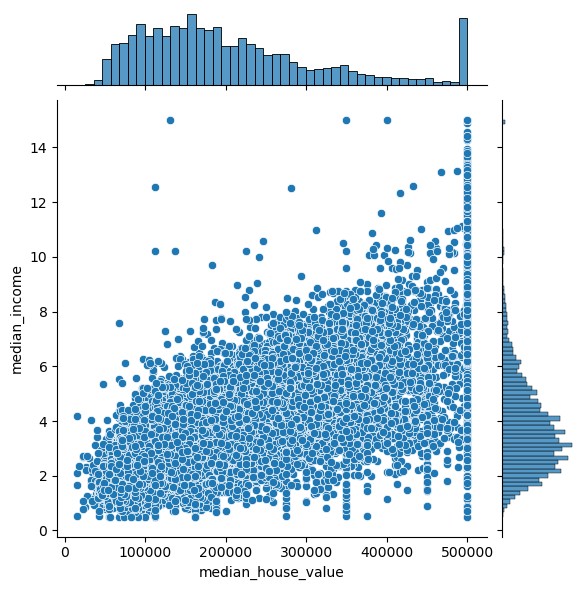

In [13]:
sns.jointplot(y=housing.median_income, x=housing.median_house_value)
plt.show()

__The distribution of median_house_value is concentrated in the lower and mid-range, with an artificial cap at__ ``$500,000``. __This suggests a possible data limitation, either due to recording policies or a market cap.__

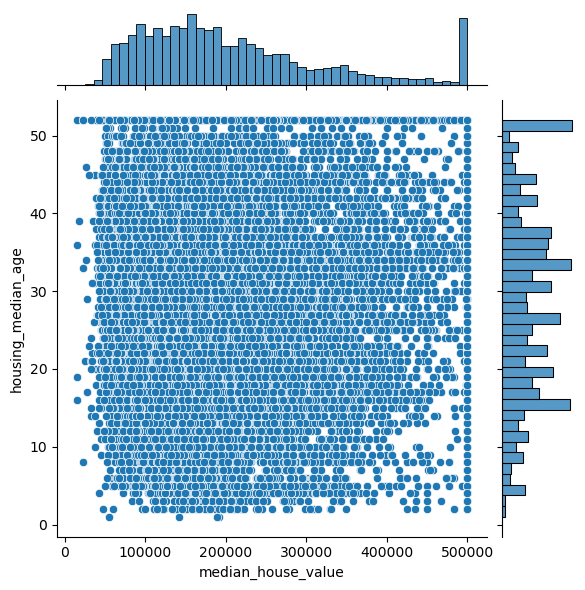

In [14]:
sns.jointplot(y=housing.housing_median_age, x=housing.median_house_value)
plt.show()

__There is no clear relationship between housing_median_age and median_house_value, suggesting that the age of a home is not a decisive factor in pricing, possibly due to renovations or maintenance efforts.__

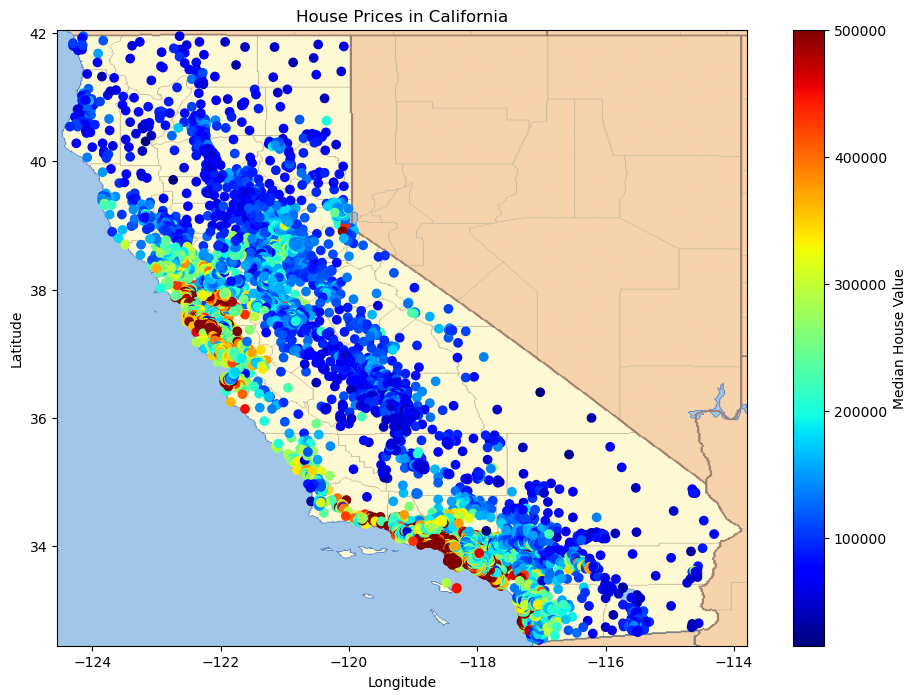

In [15]:
img = plt.imread('california.png') 
fig,ax = plt.subplots(figsize=(12,8))
img = ax.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
scatter = ax.scatter(housing.longitude, housing.latitude, c=housing.median_house_value, cmap='jet')
cbar = fig.colorbar(scatter, ax=ax, label='Median House Value')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('House Prices in California')
plt.show()

__Homes near the coast have significantly higher prices, confirming that location is a crucial factor in property valuation. Clustering analysis reveals distinct groups of districts with similar characteristics, showing clear price distribution patterns based on region, likely influenced by urban development and access to amenities.__

## Advanced Explanatory Data Analyis 

__Added an additional column "income_cat" with the following income categories:__
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [16]:
housing['income_cat'] = pd.qcut(housing.median_income,q=[0,0.25,0.5,0.75,0.95,1], labels=['low', 'below_normal', 'above_average', 'high', 'very_high'])
housing['income_cat']

0            very_high
1            very_high
2                 high
3                 high
4        above_average
             ...      
20428              low
20429              low
20430              low
20431              low
20432              low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['low' < 'below_normal' < 'above_average' < 'high' < 'very_high']

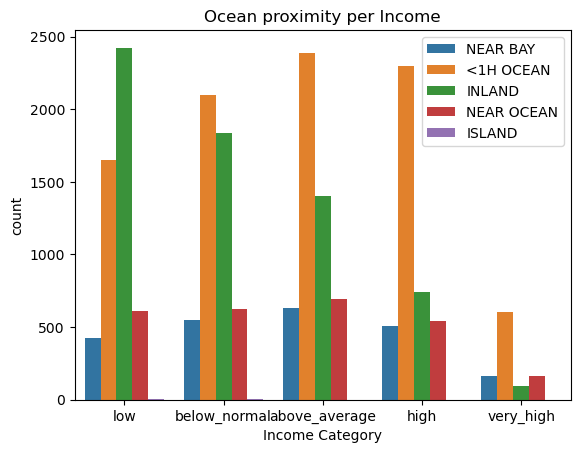

In [17]:
sns.countplot(housing,x='income_cat',hue='ocean_proximity')
plt.xlabel('Income Category')
plt.legend(title = '')
plt.title('Ocean proximity per Income')
plt.show()

__**INLAND** homes are more common in low-income areas, while those near the ocean (**<1H OCEAN**) are predominant in high-income areas. **NEAR BAY** and **NEAR OCEAN** maintain a stable presence, while **ISLAND** homes are very rare. This suggests that proximity to the ocean is associated with higher income levels.__

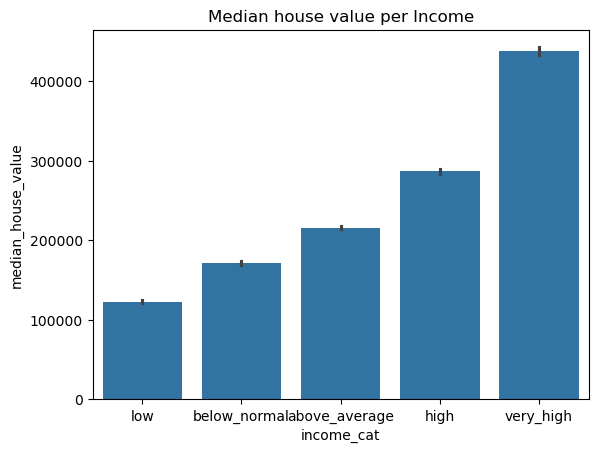

In [18]:
sns.barplot(housing, x='income_cat', y='median_house_value')
plt.title('Median house value per Income')
plt.show()

__The median home value increases as the income category rises. Homes in the **very high** income category have the highest value, exceeding **400,000**, while those in the **low** income category have the lowest value, around **120,000**. This indicates a strong positive relationship between income and home value.__

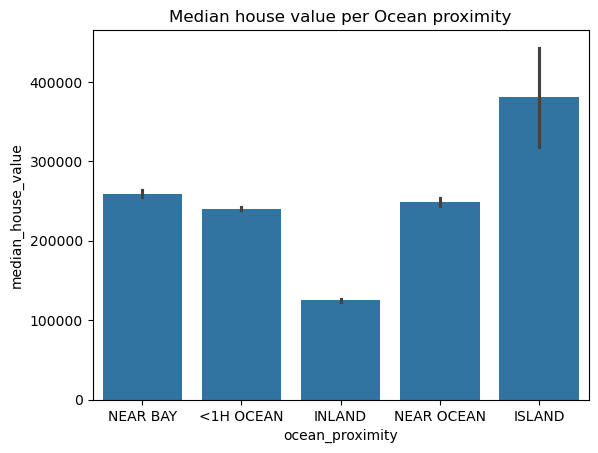

In [19]:
sns.barplot(housing, x='ocean_proximity', y='median_house_value')
plt.title('Median house value per Ocean proximity')
plt.show()

__Heatmap with mean house values for all combinations of income_cat & ocean_proximity:__

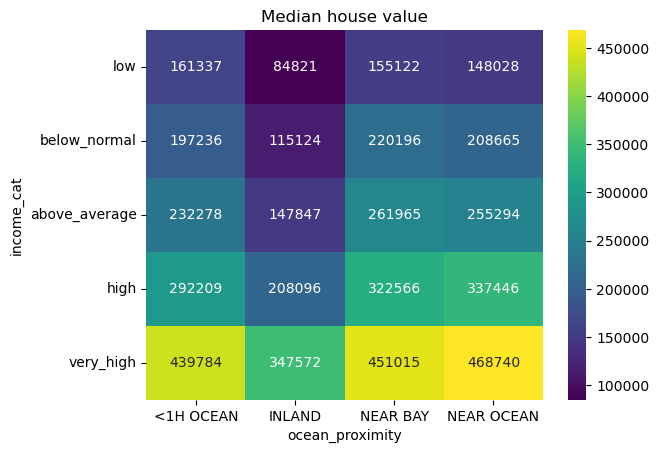

In [20]:
heatmap = housing.pivot_table(index='income_cat', columns='ocean_proximity', values='median_house_value').drop(columns='ISLAND')

sns.heatmap(heatmap, annot=True, fmt='.0f', cmap='viridis')
plt.title('Median house value')
plt.show()

## Machine Learning - Predicting House Values

### Feature Engineering 

In [21]:
y = housing.median_house_value.copy()

In [22]:
features = housing.drop(columns='median_house_value')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_household    20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

__Looking for outliers.__

In [23]:
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format

feat1 = features.select_dtypes('float').copy().apply(lambda x: stats.zscore(x))
feat1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.39,-1.45,-2.19,-1.21,-1.27,-1.25,-1.30,-1.78,-1.85,-0.23,-1.60
25%,-1.11,-0.80,-0.84,-0.54,-0.57,-0.56,-0.57,-0.69,-0.40,-0.06,-0.19
50%,0.54,-0.64,0.03,-0.23,-0.24,-0.23,-0.24,-0.18,-0.08,-0.02,-0.10
75%,0.78,0.98,0.66,0.23,0.26,0.26,0.27,0.46,0.25,0.02,0.01
max,2.63,2.96,1.86,16.79,14.02,30.23,14.60,5.86,54.97,118.82,69.25


In [24]:
feat1.agg(['mean', 'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


__Getting dummies for categorical faeature ``ocean_proximity``.__

In [25]:
from sklearn.preprocessing import OneHotEncoder

categories = [sorted(features.ocean_proximity.unique())]

encoder = OneHotEncoder(categories=categories, sparse_output=False)
proximity = pd.DataFrame(encoder.fit_transform(features.ocean_proximity.values.reshape(-1,1)), columns=encoder.categories_[0]).astype('int64')
proximity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   <1H OCEAN   20433 non-null  int64
 1   INLAND      20433 non-null  int64
 2   ISLAND      20433 non-null  int64
 3   NEAR BAY    20433 non-null  int64
 4   NEAR OCEAN  20433 non-null  int64
dtypes: int64(5)
memory usage: 798.3 KB


### Training the ML Model (Random Forest Regressor)

In [26]:
from sklearn.model_selection import train_test_split

features = pd.concat([features.drop(columns=['ocean_proximity', 'income_cat', 
                     #'longitude', 'latitude', 'housing_median_age'
                                            ]), proximity], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=.2, random_state=14)

In [27]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

cols1 = ['total_rooms', 'total_bedrooms', 'population', 'households']
X_train[cols1] = np.log1p(X_train[cols1])
X_test[cols1] = np.log1p(X_test[cols1])

cols2 = ['rooms_per_household', 'population_per_household', 'bedrooms_per_household', 'median_income']
pt = PowerTransformer(method='yeo-johnson')
X_train[cols2] = pt.fit_transform(X_train[cols2])
X_test[cols2] = pt.fit_transform(X_test[cols2])

In [28]:
y_train = np.log1p(y_train)

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(n_estimators=50, random_state=14),
                      threshold='median')


pipeline = Pipeline([('selector', sel),('rfR',RandomForestRegressor(criterion='squared_error', max_features='log2', random_state=14))])
parameters = {
  'rfR__n_estimators': (100, 150, 200),
  'rfR__max_depth': (5, 8, 12, 20),
  'rfR__min_samples_split': (15, 20, 30),
  'rfR__min_samples_leaf': (50, 75, 100),
}


grid_search = HalvingGridSearchCV(pipeline,parameters,n_jobs=-1,
                                  cv=5, verbose=1, scoring='neg_mean_squared_error', aggressive_elimination=True)

grid_search.fit(X_train,y_train)

print('Best Training score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 201
max_resources_: 16346
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 201
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 36
n_resources: 603
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 12
n_resources: 1809
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 5427
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 16281
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Training score: -0.070
Best parameters set:
	rfR__max_depth: 20
	rfR__min_samples_leaf: 50
	rfR__min_samples_split: 30
	rfR__n_estimators: 100


In [30]:
from sklearn.model_selection import cross_validate

rf_regressor = grid_search.best_estimator_

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R2': 'r2'
}

resultados = cross_validate(rf_regressor, X_train, y_train, 
                            cv=5, scoring=scoring, return_train_score=True, n_jobs=-1)

print("MAE train = ", -resultados['train_MAE'].mean())
print("MSE train = ", -resultados['train_MSE'].mean())
print("R2 train = ", resultados['train_R2'].mean())

MAE train =  0.18412844985624985
MSE train =  0.06361648902727095
R2 train =  0.804202117517683


__Evaluating the model on the Test Set.__

In [31]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

preds = rf_regressor.predict(X_test)
preds = np.expm1(preds)
mae = mean_absolute_error(preds, y_test)
mse = mean_squared_error(y_test, preds)

print(f'MAE = {mae}')
print(f'MSE = {mse}')

rf_regressor.fit(X_train, y_train)

print(f'R2 = {rf_regressor.score(X_test, np.log1p(y_test))}')

MAE = 37968.52628172827
MSE = 3253516266.014793
R2 = 0.7935301008212039


__Feature Importance__


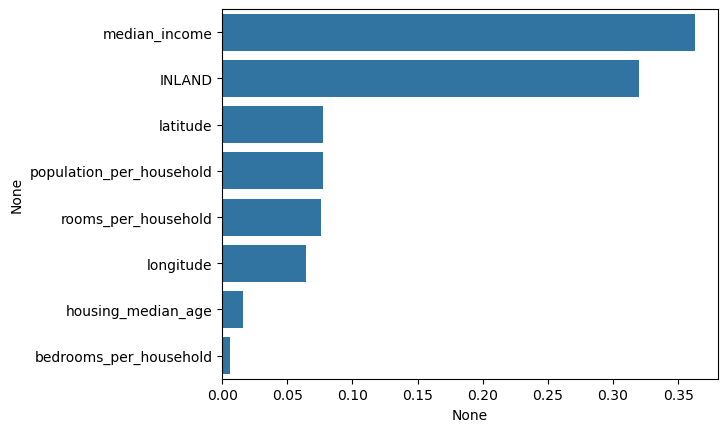

In [32]:
selector = rf_regressor.named_steps["selector"]

selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask]

importance = pd.Series(rf_regressor.named_steps["rfR"].feature_importances_
                       , index=selected_features).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
plt.show()

In [33]:
vs = pd.DataFrame({'Actual':y_test, 'Predicted':preds})

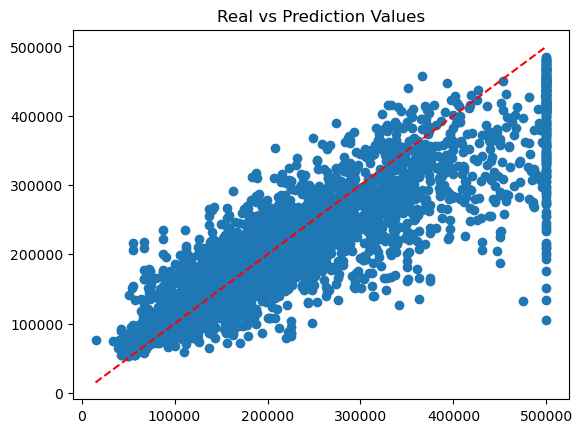

In [34]:
plt.scatter(vs.Actual, vs.Predicted)
plt.plot([min(vs.Actual), max(vs.Actual)], [min(vs.Actual), max(vs.Actual)], color='red', linestyle='--')
plt.title('Real vs Prediction Values')
plt.show()

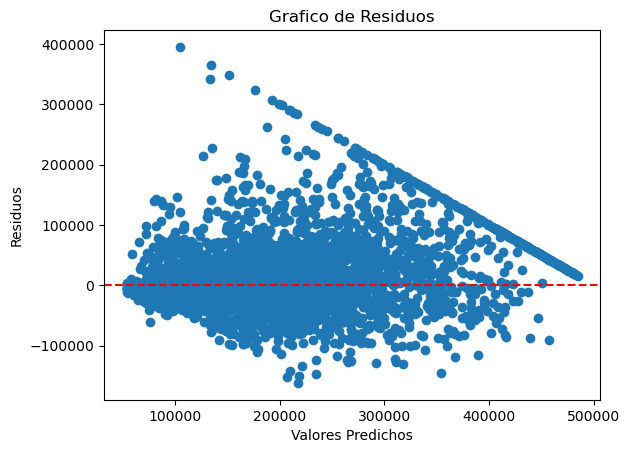

In [35]:
plt.scatter(vs.Predicted, vs.Actual - vs.Predicted)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title('Grafico de Residuos')
plt.show()